In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import os
from datetime import datetime
from scipy.stats import norm

import utils as ut
from improc import *
import worm_env as we
import policy_time as pt
import run_pol

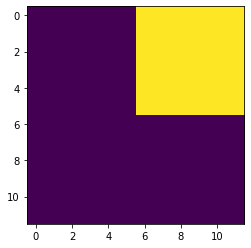

In [2]:
det_pol = np.zeros((12,12))
det_pol[:6,6:] += .4
plt.imshow(det_pol)

In [3]:
task = nidaqmx.Task()
task.ao_channels.add_ao_voltage_chan("Dev1/ao0")
task.write(0)
task.close()

In [4]:
worm = we.ProcessedWorm(0,ep_len=300)
pt.do_sampling_traj(det_pol,'panarch0.pkl',worm,6)

Done resetting	
Done resetting	
Done resetting	
Done resetting	
Done resetting	
Done resetting	


In [5]:
with open('panarch0.pkl','rb') as f:
    traj = pickle.load(f)

In [8]:
np.sum(traj['reward'])

35.21237369429409

In [10]:
locs = np.array(traj['loc']).flatten().reshape(-1,2)

In [12]:
locs.shape

(10011, 2)

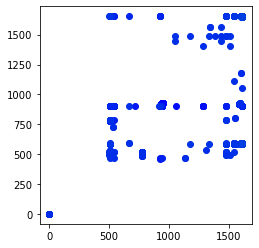

In [15]:
NPOINTS = 5000
fig,ax = plt.subplots(1)

ax.set_prop_cycle('color',plt.cm.winter(np.linspace(0,1,NPOINTS)))
for i in np.arange(0,NPOINTS-1,4):
    img = ax.scatter(locs[i,0],locs[i,1])
    ax.set_aspect('equal','box')